In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  El Índice Oceánico de El Niño (ONI en inglés)

## Descargar los datos de internet

Página web: http://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php

Datos: https://www.esrl.noaa.gov/psd/data/correlation/oni.data

### Uso de pandas para descargar los datos de Internet

In [3]:
oni = pd.read_csv("https://www.esrl.noaa.gov/psd/data/correlation/oni.data", skiprows = 1, skipfooter = 8, header = None, delim_whitespace = True, engine = "python")
oni.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
66,2016,2.53,2.23,1.68,1.03,0.48,-0.00,-0.34,-0.57,-0.68,-0.74,-0.71,-0.56
67,2017,-0.29,-0.06,0.15,0.29,0.39,0.38,0.16,-0.14,-0.44,-0.70,-0.88,-0.97
68,2018,-0.87,-0.76,-0.60,-0.41,-0.13,0.06,0.11,0.20,0.43,0.70,0.85,0.81
69,2019,0.80,0.82,0.81,0.75,0.63,0.52,0.30,0.11,0.13,0.29,0.46,0.55
70,2020,0.54,0.57,0.49,0.27,-0.01,-0.23,-99.90,-99.90,-99.90,-99.90,-99.90,-99.90


In [8]:
oni.to_csv("./data/oni.txt", index =False)

In [9]:
oni = pd.read_csv("./data/oni.txt")
oni.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
66,2016,2.53,2.23,1.68,1.03,0.48,-0.00,-0.34,-0.57,-0.68,-0.74,-0.71,-0.56
67,2017,-0.29,-0.06,0.15,0.29,0.39,0.38,0.16,-0.14,-0.44,-0.70,-0.88,-0.97
68,2018,-0.87,-0.76,-0.60,-0.41,-0.13,0.06,0.11,0.20,0.43,0.70,0.85,0.81
69,2019,0.80,0.82,0.81,0.75,0.63,0.52,0.30,0.11,0.13,0.29,0.46,0.55
70,2020,0.54,0.57,0.49,0.27,-0.01,-0.23,-99.90,-99.90,-99.90,-99.90,-99.90,-99.90


## Limpieza de datos

In [10]:
oni = oni.replace(-99.90, np.nan)
oni.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
66,2016,2.53,2.23,1.68,1.03,0.48,-0.00,-0.34,-0.57,-0.68,-0.74,-0.71,-0.56
67,2017,-0.29,-0.06,0.15,0.29,0.39,0.38,0.16,-0.14,-0.44,-0.70,-0.88,-0.97
68,2018,-0.87,-0.76,-0.60,-0.41,-0.13,0.06,0.11,0.20,0.43,0.70,0.85,0.81
69,2019,0.80,0.82,0.81,0.75,0.63,0.52,0.30,0.11,0.13,0.29,0.46,0.55
70,2020,0.54,0.57,0.49,0.27,-0.01,-0.23,NaN,NaN,NaN,NaN,NaN,NaN


## Formato ancho a largo

In [12]:
oni_dis = pd.melt (oni, id_vars= "0", value_name= "ONI", var_name="Mes")
oni_dis.tail()

,0,Mes,ONI
847,2016,12,-0.56
848,2017,12,-0.97
849,2018,12,0.81
850,2019,12,0.55
851,2020,12,NaN


## Añadir columna de fecha

In [33]:
oni_dis["Fecha"]= oni_dis.apply(lambda x: pd.to_datetime(str(x[0]) +"-"+ str (x["Mes"])).to_period("M"), axis=1)


## Subconjunto del conjunto de datos

In [38]:
oni  = oni_dis [["Fecha", "ONI"]].sort_values ("Fecha").set_index("Fecha")
oni.head()

,ONI
Fecha,
1950-01,-1.53
1950-02,-1.34
1950-03,-1.16
1950-04,-1.18
1950-05,-1.07


In [39]:
oni = oni["1995":"2019"]
oni

,ONI
Fecha,
1995-01,0.96
1995-02,0.72
1995-03,0.53
1995-04,0.30
1995-05,0.14
...,...
2019-08,0.11
2019-09,0.13
2019-10,0.29


## Trazar los datos

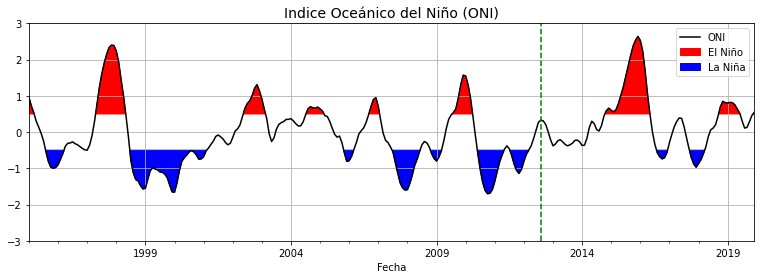

In [40]:
fig, ax = plt.subplots (figsize = (13,4))
oni.plot (ax= ax, color ="K")
ax. fill_between (oni.index, 0.5, oni.ONI, where=oni.ONI>=0.5, color="red", label="El Niño", interpolate= True)
ax. fill_between (oni.index, -0.5, oni.ONI, where= oni.ONI<=-0.5, color = "blue", label= "La Niña", interpolate= True)
ax.grid()
ax.legend()
ax.set_ylim (-3,3)
ax.set_title ("Indice Oceánico del Niño (ONI)", size=14)
ax.axvline ("2012-8", color ="green", linestyle ="dashed");


## Refactorización del código